<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Fatemi Zadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Amirparsa Bahrami

**Student ID**: 401101332



Question 1

In this question, we'll be covering what a **Gaussian Mixture Model** (GMM) is and **implementing it from scratch**.

The idea of using **Gaussian mixtures** was popularised by Duda and Hart in their seminal 1973 text, '[Pattern Classification and Scene Analysis](https://www.semanticscholar.org/paper/Pattern-classification-and-scene-analysis-Duda-Hart/b07ce649d6f6eb636872527104b0209d3edc8188)'. However, it was not until 1977 that the **Expectation-Maximisation (EM)** was presented by Dempster, Laird and Rubin in their paper, '[Maximum Likelihood from Incomplete Data Via the EM Algorithm](https://rss.onlinelibrary.wiley.com/doi/epdf/10.1111/j.2517-6161.1977.tb01600.x)'.

As we will see later, the EM algorithm is the **learning algorithm** behind a Gaussian Mixture Model (GMM), i.e. it solves the inverse problem by finding the **parameters** of the model.

We will see that **GMMs** produce clusters with **Gaussian distributions**, which are much more **flexible, and reflective** of real-life data.


In [ ]:
#add liberies here
import pandas as pd
from scipy.stats import multivariate_normal
import numpy as np
from sklearn.preprocessing import  PowerTransformer
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

Normal distribution in 1 dimension

The **normal distribution** (or Gaussian distribution) is a continuous probability distribution characterised by its **bell shape**. It has the **probability density function** given by

$$
f_{\mathcal{N}(\mu, \sigma^2)} (x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right)
$$

where

* $x$ is a real number
* $\mu$ is the mean
* $\sigma$ is the standard deviation
* $\pi=3.141592653 \ldots$.

The **multivariate normal distribution** is the generalisation of the normal disitribution to $d$ dimensions. This time, the **probability density function** is given by

$$
f_{\mathcal{N}({\boldsymbol \mu}, {\boldsymbol \Sigma})} (\textbf{x}) = \frac{1}{\sqrt{(2 \pi)^d \det({\boldsymbol \Sigma})}} \exp \left(-\frac{(\textbf{x}-{\boldsymbol \mu})^T {\boldsymbol \Sigma}^{-1} (\textbf{x}-{\boldsymbol \mu})}{2} \right)
$$

where

* $\textbf{x} = (x_1, \ldots, x_d)$ is a vector of length $d$
* ${\boldsymbol \mu} = (\mu_1, \ldots, \mu_d)$ is the mean vector
* ${\boldsymbol \Sigma}$ is the covariance matrix of size $d \times d$
* $\det({\boldsymbol \Sigma})$ is the determinant of the covariance matrix.



The main difference to the univariate case, is that each feature/dimension can be **correlerated** with the other ones. These correlations are modelled by the **covariance matrix**, which allows for the density function to be **rotated** and **stretched** to model the data as well as possible.


*Prerequisites*

A **Gaussian Mixture** is simply a combination (or mixture) of Gaussian distributions. Note that a Guassian distribution is the same as a **Normal** distribution and I will use these terms interchangeably. It is a **common** distribution that appears in **clustering** problems where the data is sampled randomly from several groups that each follow a normal distribution.

<hr>

In **1 dimension**, the model is a weighted sum of **univariate** normal distributions:

$$
f_{GMM} (x) = \sum_{j=1}^{k} \pi_j f_{\mathcal{N}(\mu_j, \sigma_{j}^2)} (x)
$$

where

* k = number of clusters
* x is a real number
* $f_{\mathcal{N}(\mu, \sigma^2)}$ is the density of a normal distribution with mean $\mu$ and variance $\sigma^2$
* $\pi = (\pi_1, ..., \pi_k)$ are the weights subject to

$$
0 \leq \pi_j \leq 1, \quad \sum_{j=1}^{k} \pi_j = 1.
$$

<hr>

In **d dimensions**, the model is a weighted sum of **multivariate** normal distributions:

$$
f_{GMM} (\textbf{x}) = \sum_{j=1}^{k} \pi_j f_{\mathcal{N}({\boldsymbol \mu}_j, {\boldsymbol \Sigma}_{j})} (\textbf{x})
$$

where

* $\textbf{x} = (x_1, \ldots, x_d)$ is now a vector of length $d$
* $f_{\mathcal{N}({\boldsymbol \mu}_j, {\boldsymbol \Sigma}_{j})}$ is the density of a **multivariate** normal distribution with mean vector ${\boldsymbol \mu}$ and covariance matrix ${\boldsymbol \Sigma}$
* $\pi = (\pi_1, ..., \pi_k)$ are the weights subject to the same conditions as before.


**Bayes' theorem**

The more **general version** of the formula, which we will also use, is given by

$$
\mathbb{P}(A_j | B) = \frac{\mathbb{P}(B | A_j) \mathbb{P}(A_j)}{\sum_{t} \mathbb{P}(B | A_t) \mathbb{P}(A_t)}.
$$

This is used when you need to **compare several posterior distributions** and choose the most probable one.

1. Example in 1D


Suppose that every month for a year, you **survey random people** from the population and ask them whether they **approve** of the prime minister/president or not. We will use Boris Johnson as an example. As you might expect, people who **support** his party (the Conservatives) are **more likely** to approve of him, whilst people who support the main **opposition** party (Labour) are **less likely** to approve of him. The distribution produced is a Gaussian Mixture.

Generate plots showing the approval ratings for both parties and their mixed distribution(similar to shown plots)?

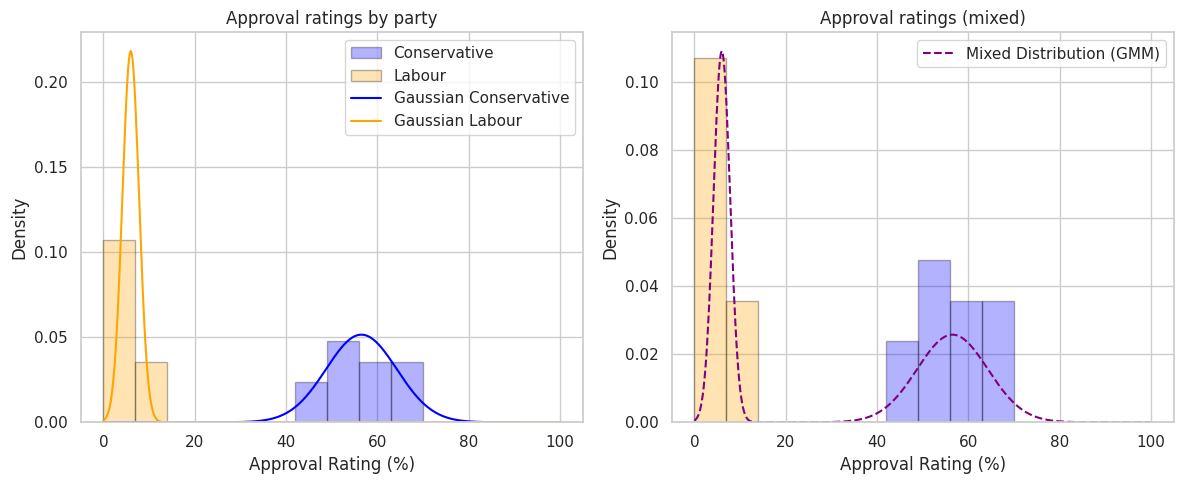

In [ ]:
# Monthly approval ratings for Boris Johnson (dates: Aug 2021- July 2022, source: YouGov)
df_approval = pd.DataFrame({'Conservative': [67,70,66,57,47,46,50,60,59,55,51,50], 'Labour': [11,7,7,6,6,4,6,4,6,6,5,4]})
#your code

# Calculate mean and standard deviation for Conservative and Labour approval ratings
mean_conservative = np.mean(df_approval['Conservative'])
std_conservative = np.std(df_approval['Conservative'])

mean_labour = np.mean(df_approval['Labour'])
std_labour = np.std(df_approval['Labour'])

# Define the x-axis range for plotting distributions
x = np.linspace(0, 100, 500)

# Calculate probability density functions for both parties
pdf_conservative = norm.pdf(x, mean_conservative, std_conservative)
pdf_labour = norm.pdf(x, mean_labour, std_labour)

# Set a style for the plots
sns.set(style="whitegrid")

# Plot 1: Approval distributions for Conservative and Labour parties with histogram for real data
plt.figure(figsize=(12, 5))

# Subplot 1: Conservative and Labour distributions
plt.subplot(1, 2, 1)
plt.hist(df_approval['Conservative'], bins=10, range=(0, 70), color='blue', alpha=0.3, density=True, label='Conservative', edgecolor='black')
plt.hist(df_approval['Labour'], bins=10, range=(0, 70), color='orange', alpha=0.3, density=True, label='Labour', edgecolor='black')
plt.plot(x, pdf_conservative, color='blue', label='Gaussian Conservative')
plt.plot(x, pdf_labour, color='orange', label='Gaussian Labour')
plt.title("Approval ratings by party")
plt.xlabel("Approval Rating (%)")
plt.ylabel("Density")
plt.legend()

# Subplot 2: Mixed distribution
plt.subplot(1, 2, 2)
# Mixed histogram (combining Conservative and Labour)
plt.hist(df_approval['Conservative'], bins=10, range=(0, 70), color='blue', alpha=0.3, density=True, edgecolor='black')
plt.hist(df_approval['Labour'], bins=10, range=(0, 70), color='orange', alpha=0.3, density=True, edgecolor='black')
# Calculate the mixed Gaussian distribution (GMM)
pdf_mixed = 0.5 * pdf_conservative + 0.5 * pdf_labour
plt.plot(x, pdf_mixed, color='purple', linestyle='--', label='Mixed Distribution (GMM)')
plt.title("Approval ratings (mixed)")
plt.xlabel("Approval Rating (%)")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

How do plots change if we included data of **additional** parties (like Liberal Democrats, Greens, etc)?

Adding data from additional parties like the Liberal
Democrats and Greens would make the plots more complex, with each party having its own Gaussian curve and histogram in the individual distribution plot. The legend would expand to include each party, and careful color differentiation would be essential for clarity. In the mixed distribution plot, the Gaussian Mixture Model (GMM) would incorporate all parties, likely resulting in a more multi-peaked and less smooth curve, reflecting varied approval levels. Overall, the x-axis might need extension to accommodate the broader range of approval ratings, offering a more comprehensive view of the political landscape.

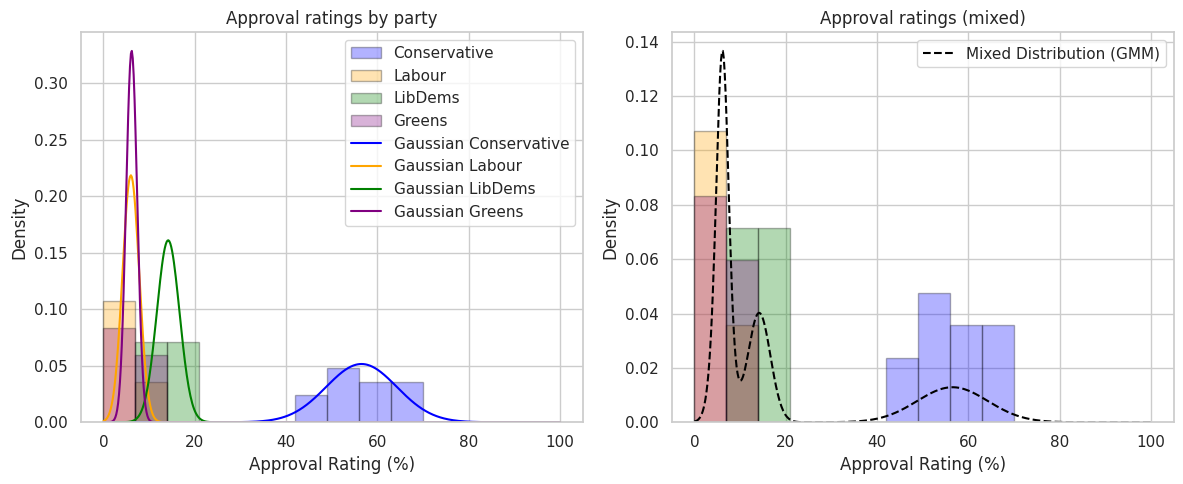

In [ ]:
# Monthly approval ratings for Boris Johnson (Aug 2021 - July 2022)
df_approval = pd.DataFrame({
    'Conservative': [67, 70, 66, 57, 47, 46, 50, 60, 59, 55, 51, 50],
    'Labour': [11, 7, 7, 6, 6, 4, 6, 4, 6, 6, 5, 4],
    'LibDems': [20, 18, 15, 14, 13, 12, 13, 15, 14, 13, 12, 11],
    'Greens': [5, 4, 6, 7, 8, 7, 8, 6, 7, 6, 5, 5]
})

# Calculate mean and standard deviation for each party
mean_conservative = np.mean(df_approval['Conservative'])
std_conservative = np.std(df_approval['Conservative'])

mean_labour = np.mean(df_approval['Labour'])
std_labour = np.std(df_approval['Labour'])

mean_libdems = np.mean(df_approval['LibDems'])
std_libdems = np.std(df_approval['LibDems'])

mean_greens = np.mean(df_approval['Greens'])
std_greens = np.std(df_approval['Greens'])

# Define the x-axis range for plotting distributions
x = np.linspace(0, 100, 500)

# Calculate probability density functions for each party
pdf_conservative = norm.pdf(x, mean_conservative, std_conservative)
pdf_labour = norm.pdf(x, mean_labour, std_labour)
pdf_libdems = norm.pdf(x, mean_libdems, std_libdems)
pdf_greens = norm.pdf(x, mean_greens, std_greens)

# Set a style for the plots
sns.set(style="whitegrid")

# Plot 1: Approval distributions for each party with histograms for real data
plt.figure(figsize=(12, 5))

# Subplot 1: Individual party distributions
plt.subplot(1, 2, 1)
plt.hist(df_approval['Conservative'], bins=10, range=(0, 70), color='blue', alpha=0.3, density=True, label='Conservative', edgecolor='black')
plt.hist(df_approval['Labour'], bins=10, range=(0, 70), color='orange', alpha=0.3, density=True, label='Labour', edgecolor='black')
plt.hist(df_approval['LibDems'], bins=10, range=(0, 70), color='green', alpha=0.3, density=True, label='LibDems', edgecolor='black')
plt.hist(df_approval['Greens'], bins=10, range=(0, 70), color='purple', alpha=0.3, density=True, label='Greens', edgecolor='black')
plt.plot(x, pdf_conservative, color='blue', label='Gaussian Conservative')
plt.plot(x, pdf_labour, color='orange', label='Gaussian Labour')
plt.plot(x, pdf_libdems, color='green', label='Gaussian LibDems')
plt.plot(x, pdf_greens, color='purple', label='Gaussian Greens')
plt.title("Approval ratings by party")
plt.xlabel("Approval Rating (%)")
plt.ylabel("Density")
plt.legend()

# Subplot 2: Mixed distribution (GMM)
plt.subplot(1, 2, 2)
# Combined histogram for all parties
plt.hist(df_approval['Conservative'], bins=10, range=(0, 70), color='blue', alpha=0.3, density=True, edgecolor='black')
plt.hist(df_approval['Labour'], bins=10, range=(0, 70), color='orange', alpha=0.3, density=True, edgecolor='black')
plt.hist(df_approval['LibDems'], bins=10, range=(0, 70), color='green', alpha=0.3, density=True, edgecolor='black')
plt.hist(df_approval['Greens'], bins=10, range=(0, 70), color='purple', alpha=0.3, density=True, edgecolor='black')
# Mixed Gaussian distribution (GMM) with equal weights
pdf_mixed = 0.25 * pdf_conservative + 0.25 * pdf_labour + 0.25 * pdf_libdems + 0.25 * pdf_greens
plt.plot(x, pdf_mixed, color='black', linestyle='--', label='Mixed Distribution (GMM)')
plt.title("Approval ratings (mixed)")
plt.xlabel("Approval Rating (%)")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

2. Example in 2D

For this example, we will select 2 features from the famous **Iris dataset**. This contains observations of flowers, like petal lengths, for **3 different species**, so k=3.

Loads the Iris dataset and selects the 'sepal_length', 'petal_length', and 'species' columns.

Creates a 2D scatter plot of 'sepal_length' versus 'petal_length', coloring the points based on species.

Estimates a 2D Gaussian mixture model for each species using the 'sepal_length' and 'petal_length' features, and plots the resulting Gaussian mixture as a 3D surface plot.

Make sure to use the multivariate_normal.pdf function for estimating the Gaussian mixture and include proper titles and axis labels for the plots.

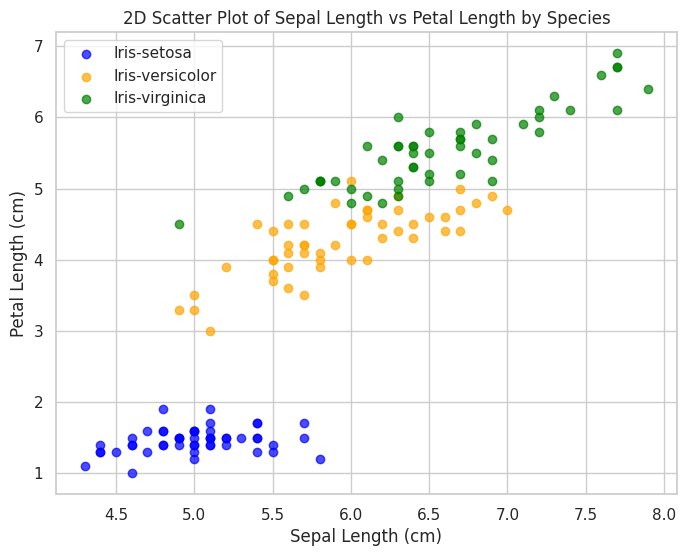

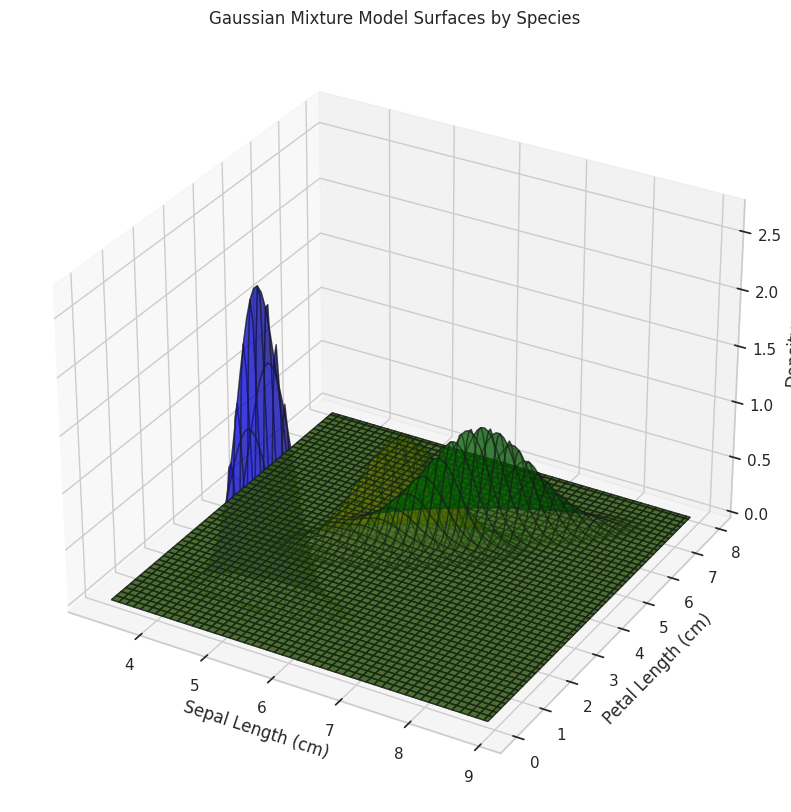

In [ ]:
# Assuming the iris.csv file is in the same directory
# Load the dataset
df = pd.read_csv('IRIS.csv')

# Select only the 'sepal_length', 'petal_length', and 'species' columns
df = df[['sepal_length', 'petal_length', 'species']]

# Map colors for each species
species_colors = {0: 'blue', 1: 'orange', 2: 'green'}
df['species'] = df['species'].astype('category')
df['species_code'] = df['species'].cat.codes
colors = df['species_code'].map(species_colors)

# Create a 2D scatter plot of sepal_length vs. petal_length colored by species
plt.figure(figsize=(8, 6))
for species in df['species'].cat.categories:
    species_data = df[df['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['petal_length'],
                color=species_colors[species_data['species_code'].iloc[0]],
                label=species, alpha=0.7)

plt.title("2D Scatter Plot of Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()

# Setup for 3D surface plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(df['sepal_length'].min() - 1, df['sepal_length'].max() + 1, 100)
y = np.linspace(df['petal_length'].min() - 1, df['petal_length'].max() + 1, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Plot Gaussian Mixture Model surfaces for each species
for species in df['species'].cat.categories:
    species_data = df[df['species'] == species][['sepal_length', 'petal_length']].values

    # Fit a Gaussian Mixture model
    gmm = GaussianMixture(n_components=1, covariance_type='full')
    gmm.fit(species_data)

    # Extract Gaussian parameters
    mu = gmm.means_[0]
    sigma = gmm.covariances_[0]

    # Calculate Gaussian PDF over the grid
    rv = multivariate_normal(mean=mu, cov=sigma)
    Z = rv.pdf(pos)

    # Plot the surface
    color = species_colors[df[df['species'] == species]['species_code'].iloc[0]]
    ax.plot_surface(X, Y, Z, color=color, alpha=0.5, edgecolor='k')

# Labels and title for the 3D plot
ax.set_title("Gaussian Mixture Model Surfaces by Species")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Density")
plt.show()

Given the **density plot**, and the fact that we're searching for 3 clusters, how do we decide which data points belong **together** (i.e. correspond to the same flower), and which ones don't?

To decide which data points belong together in the Iris dataset, we use a Gaussian Mixture Model (GMM) with three components, corresponding to the three flower species. The GMM models each cluster as a 2D Gaussian distribution based on the sepal_length and petal_length features. For each data point, the model calculates the probability of belonging to each Gaussian, assigning the point to the cluster where it has the highest density. This probabilistic approach groups points that are in the same high-density region of a Gaussian, effectively clustering similar points (flowers of the same species) based on their feature proximity.

**Expectation-Maximisation algorithm**


We'll start by building the **intuition** on how EM works by working through an example in 1 dimension. We will then formalise the general algorithm in d dimensions afterwards.

Let's start with some **data** that we think has been generated by a **Gaussian mixture** with **k=2** classes in **1 dimension**.



## Initialisation

The **first task** for the algorithm is to **randomly choose parameters** $\mu_1, \mu_2, \sigma_1^2, \sigma_2^2$ for the two normal distributions. We also need to choose some **weights** $\pi_1, \pi_2$, which tells us the **relative heights** of the curves. A good choice for the initial weights is $(\pi_1, \pi_2)=(0.5,0.5)$, i.e. the uniform distribution.

## E-step

The **next step** (called the E-step) is to calculate how likely does each data point belong to each **class**. For example, consider the **rightmost point** on the diagram. Even though it is very **far from both** the green and orange distributions (and so is **unlikely** to have been generated from either of them), it is much **closer** to the green one. This means it is **more likely** to have been generated from the green distribution than the orange one, even if these probabilites are small.

<hr>

**Bayes' formula** uses this idea of likelihood to find the probabilities we want:

$$
a_i = \mathbb{P}(C_1 | x_i) = \frac{\mathbb{P}(x_i|C_1) \mathbb{P}(C_1)}{\mathbb{P}(x_i|C_1) \mathbb{P}(C_1) + \mathbb{P}(x_i|C_2) \mathbb{P}(C_2)} = \frac{\mathbb{P}(x_i|C_1) \pi_1}{\mathbb{P}(x_i|C_1) \pi_1 + \mathbb{P}(x_i|C_2) \pi_2}
$$

where the **likelihood** is given by

$$
\mathbb{P}(x_i|C_1) = \frac{1}{\sqrt{2 \pi \sigma_1^2}} \exp \left(-\frac{(x_i-\mu_1)^2}{2 \sigma_1^2} \right)
$$

<hr>

Note that since there are only $k=2$ classes, we have $b_i = \mathbb{P}(C_2 | x_i) = 1 - \mathbb{P}(C_1 | x_i) = 1-a_i$.

E.g. if $a_i = 0.99$ then $b_i = 0.01$.

<hr>

So now we can think of the data points as being a **bit of orange** and a **bit of green** together. The exact proportion depends on the probabilities.

## M-step

Now we can **update the parameters** (called the M-step). Unlike in k-Means, which assigns classes using the **maximum** of these probabilites, GMMs use the **probabilities** to estimate the means and variances as weighted averages.

For the **orange** distribution:

$$
\mu_1 = \frac{\sum_{i=1}^{n} a_i x_i}{\sum_{i=1}^{n} a_i}, \quad \sigma_1^2 = \frac{\sum_{i=1}^{n} a_i (x_i - \mu_1)^2}{\sum_{i=1}^{n} a_i}
$$

And for the **green** distribution:
$$
\mu_2 = \frac{\sum_{i=1}^{n} b_i x_i}{\sum_{i=1}^{n} b_i}, \quad \sigma_2^2 = \frac{\sum_{i=1}^{n} b_i (x_i - \mu_1)^2}{\sum_{i=1}^{n} b_i}
$$

These are just **weighted averages** of the usual formulas for mean and variance. The idea is that points **closest** to the distribution **contribute the most** to updating the correspoding parameters.

<hr>

And we can't forget about updating the weights as well. This is done by **averaging** over the posterior probabilities:

$$
\pi_1 = \frac{\sum_{i=1}^{n} a_i}{n}, \quad \pi_2 = \frac{\sum_{i=1}^{n} b_i}{n}
$$

You can think of this as calculating the **proportion** of the data that each cluster is describing.

<hr>

And all that is left to do is to **iterate** until convergence!


Implementation

You are given the partial implementation of a Gaussian Mixture Model (GMM) class. Complete the following parts of the code

In [ ]:
class GMM:
    def __init__(self, k, max_iter=100, random_state=0):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state

    def initialise(self, X):
        self.shape = X.shape
        self.n, self.d = self.shape

        # Initialize mixing coefficients uniformly
        self.pi = np.full(shape=self.k, fill_value=1/self.k)
        self.responsibilities = np.zeros((self.n, self.k))

        # Initialize mu and sigma
        np.random.seed(self.random_state)
        random_row = np.random.choice(self.n, self.k, replace=False)
        self.mu = X[random_row]

        # Initialize sigma as identity matrices
        self.sigma = np.array([np.eye(self.d) for _ in range(self.k)])

    def E_step(self, X):
        # Update responsibilities
        likelihood = np.zeros((self.n, self.k))
        for j in range(self.k):
            try:
                distribution = multivariate_normal(mean=self.mu[j], cov=self.sigma[j], allow_singular=True)
                likelihood[:, j] = distribution.pdf(X)
            except np.linalg.LinAlgError:
                # Handle singular covariance matrix
                self.sigma[j] += 1e-6 * np.eye(self.d)
                distribution = multivariate_normal(mean=self.mu[j], cov=self.sigma[j], allow_singular=True)
                likelihood[:, j] = distribution.pdf(X)

        numerator = likelihood * self.pi
        denominator = numerator.sum(axis=1)[:, np.newaxis]

        # Avoid division by zero
        denominator = np.where(denominator == 0, 1e-8, denominator)
        self.responsibilities = numerator / denominator

    def M_step(self, X):
        # Update pi, mu, and sigma
        n_k = self.responsibilities.sum(axis=0)
        self.pi = n_k / self.n

        self.mu = np.zeros((self.k, self.d))
        self.sigma = np.zeros((self.k, self.d, self.d))

        for j in range(self.k):
            total_responsibility = n_k[j]
            if total_responsibility == 0:
                # Reinitialize the cluster to avoid empty cluster
                self.mu[j] = X[np.random.choice(self.n)]
                self.sigma[j] = np.eye(self.d)
                self.pi[j] = 1.0 / self.k
            else:
                responsibility = self.responsibilities[:, j]
                self.mu[j] = (responsibility[:, np.newaxis] * X).sum(axis=0) / total_responsibility

                diff = X - self.mu[j]
                weighted_diff = responsibility[:, np.newaxis] * diff
                self.sigma[j] = np.dot(weighted_diff.T, diff) / total_responsibility

                # Regularize the covariance matrix
                self.sigma[j] += 1e-6 * np.eye(self.d)

    def fit(self, X):
        self.initialise(X)

        for iteration in range(self.max_iter):
            old_mu = self.mu.copy()
            self.E_step(X)
            self.M_step(X)

            # Check for convergence (optional)
            if np.allclose(self.mu, old_mu):
                print(f'Converged at iteration {iteration}')
                break

    def predict_proba(self, X):
        likelihood = np.zeros((X.shape[0], self.k))
        for j in range(self.k):
            distribution = multivariate_normal(mean=self.mu[j], cov=self.sigma[j], allow_singular=True)
            likelihood[:, j] = distribution.pdf(X)

        numerator = likelihood * self.pi
        denominator = numerator.sum(axis=1)[:, np.newaxis]

        # Avoid division by zero
        denominator = np.where(denominator == 0, 1e-8, denominator)
        responsibilities = numerator / denominator
        return responsibilities

    def predict(self, X):
        responsibilities = self.predict_proba(X)
        return np.argmax(responsibilities, axis=1)

    def fit_predict(self, X):
        self.fit(X)
        predictions = self.predict(X)
        return predictions

We will apply it to this months TPS competition which is on **unsupervised clustering**.
The dataset is made up of **29 features** and **98,000** data points and the task is to **cluster the data**.

In [ ]:
data=pd.read_csv('data.csv', index_col='id')

# Preprocess data
scaled_data = pd.DataFrame(PowerTransformer().fit_transform(data))
scaled_data.columns = data.columns
drop_feats = [f'f_0{i}' for i in range(7)]
drop_feats = drop_feats + [f'f_{i}' for i in range(14,22)]
X = scaled_data.drop(drop_feats, axis=1).values

In [ ]:
%%time

# Gaussian Mixture Model
gmm = GMM(k=7, max_iter=100)
preds = gmm.fit_predict(X)

CPU times: user 34.3 s, sys: 16.4 s, total: 50.7 s
Wall time: 29.9 s


Question 2

In this question, we are examining two common estimators of variance. The first estimator, related to MLE (Maximum Likelihood Estimation), is:

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

The next estimator, including Bessel's correction, is:

$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

* Generate 1000 samples from a Normal distribution $ \mathcal{N}(2, 2) $ and calculate both estimators for each sample.

In [ ]:
# Define parameters for the normal distribution
mu = 2  # Mean of the normal distribution
variance = 2    # Variance
sigma = np.sqrt(variance)  # Standard deviation

# Generate 1000 samples from the normal distribution N(2, 2)
samples = np.random.normal(mu, sigma, n_samples)

# Calculate the two variance estimators
# MLE variance estimator (dividing by n)
variance_mle = np.sum((samples - np.mean(samples))**2) / n_samples

# Unbiased variance estimator (dividing by n-1)
variance_bessel = np.sum((samples - np.mean(samples))**2) / (n_samples - 1)

print("MLE variance estimator:", variance_mle)
print("Unbiased variance estimator with Bessel's correction:", variance_bessel)

MLE variance estimator: 2.0157780364016884
Unbiased variance estimator with Bessel's correction: 2.0177958322339222


- Now, plot these values on a graph.
- Considering the graph, are these two estimators consistent with each other?

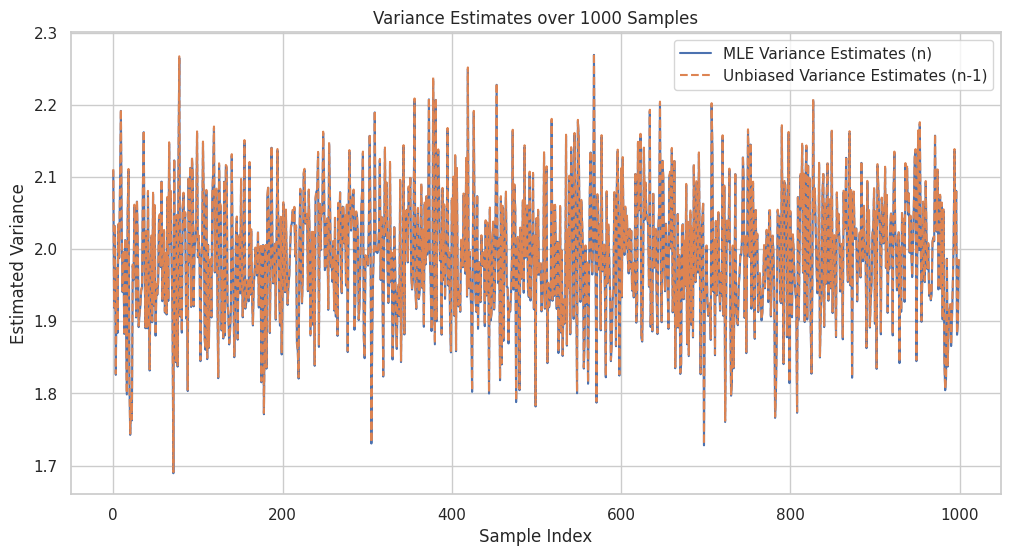

In [ ]:
mu = 2          # Mean
variance = 2    # Variance
sigma = np.sqrt(variance)  # Standard deviation

# Set the sample size
n = 1000

# Number of samples/datasets to generate
num_samples = 1000

# Arrays to store the variance estimates
mle_variances = []
unbiased_variances = []

# Generate 1000 datasets and calculate both estimators for each
for _ in range(num_samples):
    # Generate a sample of size n from N(2,2)
    sample = np.random.normal(loc=mu, scale=sigma, size=n)

    # Calculate the sample mean
    sample_mean = np.mean(sample)

    # Calculate the sum of squared deviations from the mean
    ssd = np.sum((sample - sample_mean) ** 2)

    # MLE estimator (dividing by n)
    mle_var = ssd / n
    mle_variances.append(mle_var)

    # Unbiased estimator (dividing by n-1)
    unbiased_var = ssd / (n - 1)
    unbiased_variances.append(unbiased_var)

# Plot the variance estimates
plt.figure(figsize=(12, 6))
plt.plot(mle_variances, label='MLE Variance Estimates (n)')
plt.plot(unbiased_variances, label='Unbiased Variance Estimates (n-1)', linestyle='--')
plt.title('Variance Estimates over 1000 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Estimated Variance')
plt.legend()
plt.show()


Answer:
	Consistency: The two estimators yield very similar values over repeated sampling, indicating consistency in their behavior. While the MLE estimator tends to be slightly lower, this difference diminishes as the sample size increases.

Thus, while they are not identical, they are largely consistent with each other, especially as  n  grows. Bessel’s correction is most impactful for smaller sample sizes, where it corrects the slight bias present in the MLE estimator.

Generate 100,000 data samples from the same distribution and calculate the mean of each estimator.

Considering these values, are the two estimators unbiased?

In [ ]:
# Now, generate 100,000 datasets and calculate the mean of each estimator
num_samples_large = 100000
mle_variances_large = []
unbiased_variances_large = []

for _ in range(num_samples_large):
    # Generate a sample of size n from N(2,2)
    sample = np.random.normal(loc=mu, scale=sigma, size=n)

    # Calculate the sample mean
    sample_mean = np.mean(sample)

    # Calculate the sum of squared deviations from the mean
    ssd = np.sum((sample - sample_mean) ** 2)

    # MLE estimator (dividing by n)
    mle_var = ssd / n
    mle_variances_large.append(mle_var)

    # Unbiased estimator (dividing by n-1)
    unbiased_var = ssd / (n - 1)
    unbiased_variances_large.append(unbiased_var)

# Calculate the mean of each estimator
mean_mle_variance = np.mean(mle_variances_large)
mean_unbiased_variance = np.mean(unbiased_variances_large)

print(f"Mean of MLE Variance Estimates over {num_samples_large} samples: {mean_mle_variance:.5f}")
print(f"Mean of Unbiased Variance Estimates over {num_samples_large} samples: {mean_unbiased_variance:.5f}")
print(f"True Variance: {variance}")

Mean of MLE Variance Estimates over 100000 samples: 1.99808
Mean of Unbiased Variance Estimates over 100000 samples: 2.00008
True Variance: 2


Answer: The estimator using
n−1 (with Bessel's correction) is unbiased, while the estimator using
n (MLE) is slightly biased downward. So, no, both estimators are not unbiased—the MLE estimator is biased, but the bias is negligible for large samples.